# STOCK PRICE PREDICTION

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('1767133-1729258-1613615-Stock_Price_data_set_(1).csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.shape

(1009, 7)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


## Exploratory Data analysis

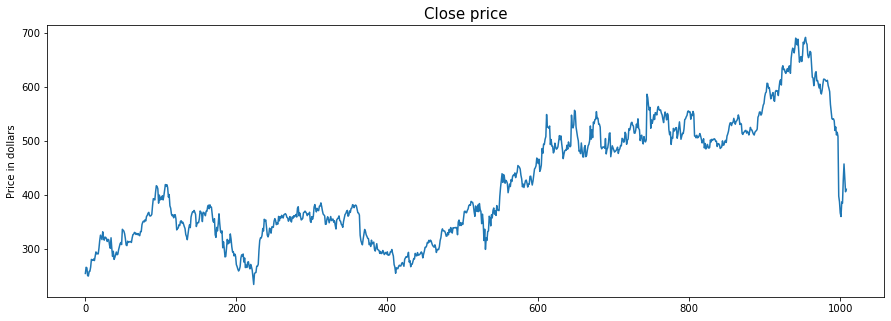

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Close price',fontsize = 15)
plt.ylabel('Price in dollars')
plt.show()

The prices of stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [9]:
df[df['Close']== df['Adj Close']].shape

(1009, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [10]:
df = df.drop(['Adj Close'], axis = 1)

Now let’s draw the distribution plot for the continuous features given in the dataset.

Before moving further let’s check for the null values if any are present in the data frame.

In [11]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

This implies that there are no null values in the data set provided.

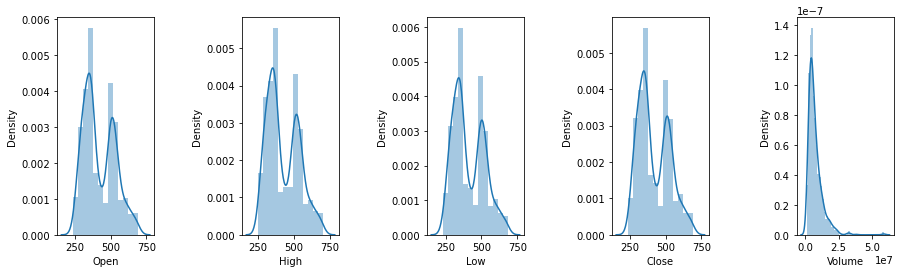

In [12]:

features = ['Open','High','Low','Close','Volume']

fig,axes = plt.subplots(nrows = 1, ncols = 5,figsize = (15,4))

sns.distplot(df['Open'],ax = axes[0])
sns.distplot(df['High'],ax = axes[1])
sns.distplot(df['Low'],ax = axes[2])
sns.distplot(df['Close'],ax = axes[3])
sns.distplot(df['Volume'],ax = axes[4])

fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.9,
    hspace=0.1,)

plt.show()

plt.show()



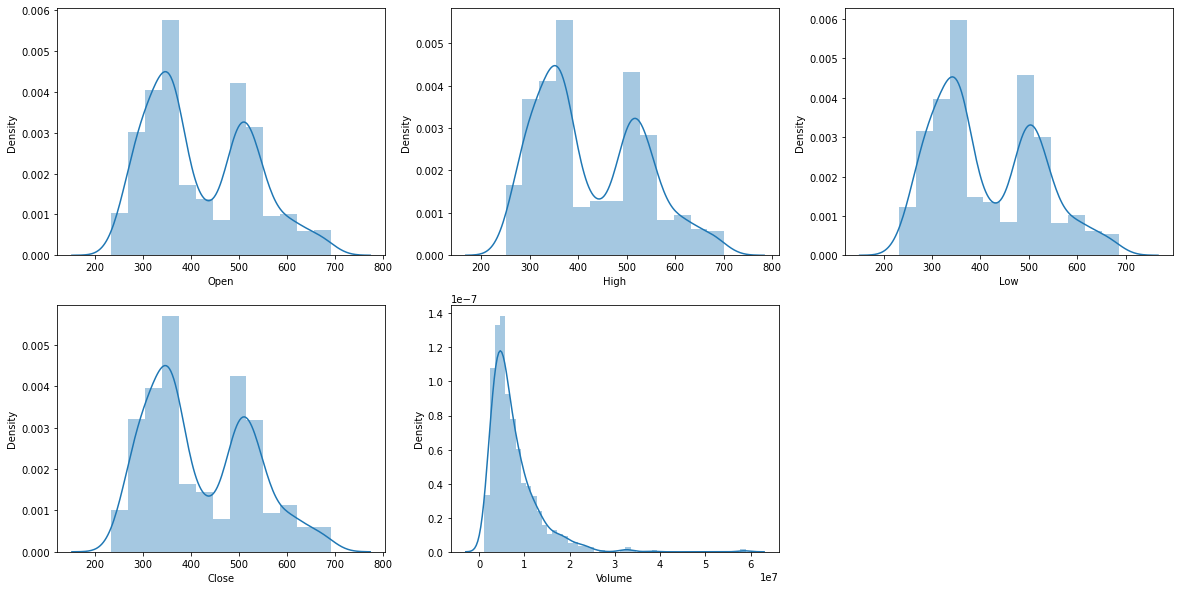

In [13]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

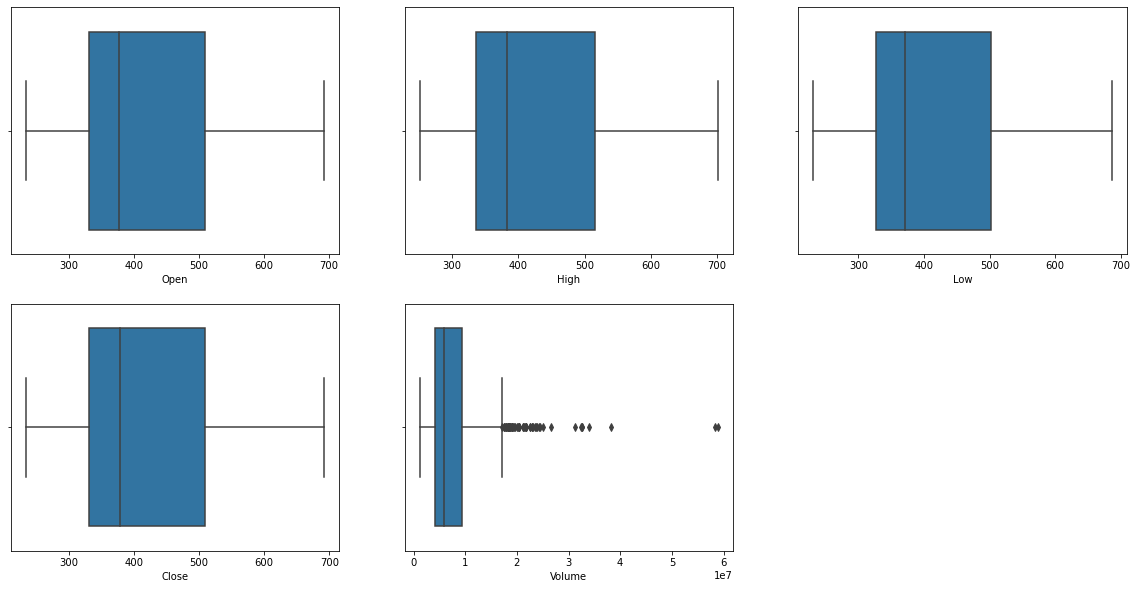

In [14]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])
plt.show()

From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

## Feature Engineering

In [15]:
split_date = df['Date'].str.split('-', expand = True)

df['day'] = split_date[2].astype('int')
df['month'] = split_date[1].astype('int')
df['year'] = split_date[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018


In [87]:
df['is_quater_end'] = np.where(df['month']%3 == 0, 1, 0)
df.tail()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quater_end,open-close,low-high,target
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,31,1,2022,0,-25.170014,-29.500000,1
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,1,2,2022,0,-24.170014,-32.940002,0
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,2,2,2022,0,18.769989,-25.500000,0
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,3,2,2022,0,15.839996,-24.980011,1
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,7782400,4,2,2022,0,-2.860015,-16.129974,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

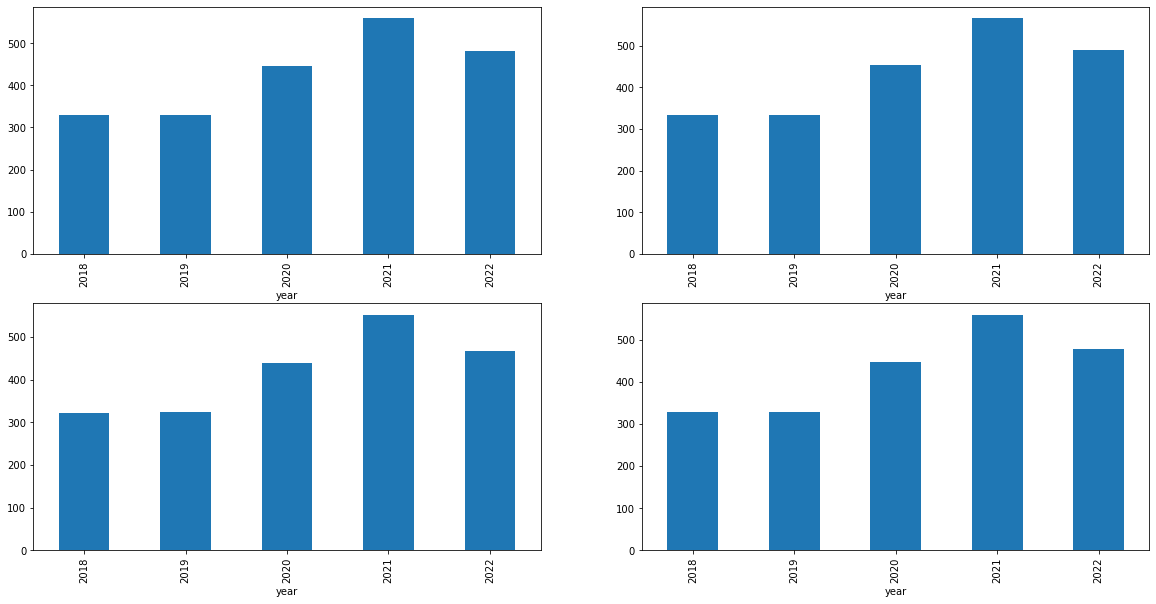

In [17]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quater_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018,0


In [19]:
df.groupby('is_quater_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quater_end,,,,,,,,
0,418.681368,424.889821,412.112068,418.699791,7.951664e+06,15.715774,6.087798,2019.622024
1,419.814037,426.179910,412.896440,419.600831,6.810988e+06,15.721068,7.442136,2019.543027


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [20]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quater_end,open-close,low-high,target
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018,0,7.740005,-17.869995,1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018,0,-18.020004,-21.700012,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018,0,2.019989,-8.120025,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018,0,16.979981,-17.619995,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018,0,4.380005,-19.690002,1


Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

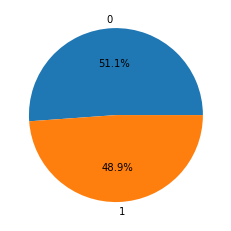

In [22]:
plt.pie(df['target'].value_counts().values,labels =[0,1],autopct = '%1.1f%%');

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

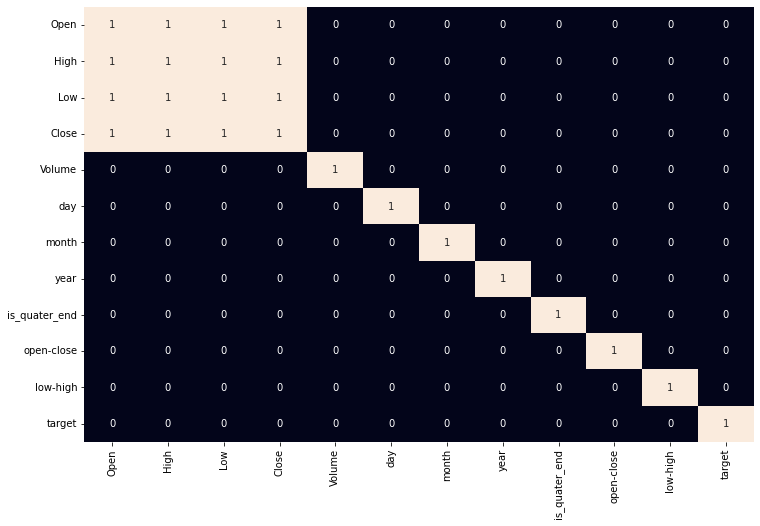

In [23]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr()>0.9, annot = True, cbar = False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.



## Splitting the data into features and Labels

In [90]:
X = df[['open-close','low-high','is_quater_end']]
y = df['target']
print(X.head())

print(y.head())

   open-close   low-high  is_quater_end
0    7.740005 -17.869995              0
1  -18.020004 -21.700012              0
2    2.019989  -8.120025              0
3   16.979981 -17.619995              0
4    4.380005 -19.690002              0
0    1
1    0
2    0
3    0
4    1
Name: target, dtype: int32


## Train Test split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_model = LogisticRegression()

In [29]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [30]:
log_model.coef_

array([[0.01000103, 0.02284616, 0.14574244]])

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,roc_auc_score

In [32]:
y_pred = log_model.predict(scaled_X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.4801980198019802

In [34]:
confusion_matrix(y_test,y_pred)

array([[  0, 105],
       [  0,  97]], dtype=int64)

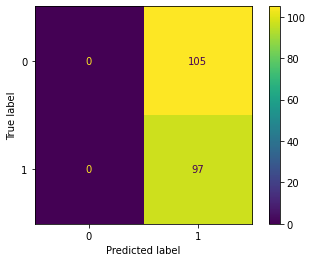

In [35]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

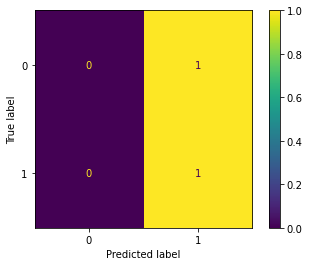

In [36]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize = 'true')

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.48      1.00      0.65        97

    accuracy                           0.48       202
   macro avg       0.24      0.50      0.32       202
weighted avg       0.23      0.48      0.31       202



In [38]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1,-1))

array([[0.43754268, 0.56245732]])

In [39]:
log_model.predict(X_train.iloc[0].values.reshape(1,-1))

array([1])

## Support Vector Classifier

In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC(kernel = 'linear', C = 1000)
model.fit(scaled_X_train,y_train)

SVC(C=1000, kernel='linear')

In [42]:
from sklearn.model_selection import GridSearchCV
svc_model = SVC()

In [43]:
param_grid = {'kernel':['linear','rbf',],'C':[0.01,0.1,1],'probability' :[True,False]}
grid_search = GridSearchCV(svc_model,param_grid)

In [44]:
grid_search.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf'],
                         'probability': [True, False]})

In [45]:
grid_search.best_score_

0.5192086496434323

In [46]:
grid_search.best_params_

{'C': 0.01, 'kernel': 'rbf', 'probability': True}

In [58]:
final_svc_model = SVC(C= 0.01, kernel = 'rbf',probability = True)
final_svc_model.fit(scaled_X_train,y_train)

SVC(C=0.01, probability=True)

In [59]:
y_pred = log_model.predict(scaled_X_test)

In [60]:
accuracy_score(y_test,y_pred)

0.4801980198019802

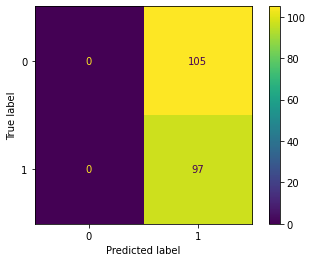

In [61]:
plot_confusion_matrix(final_svc_model,scaled_X_test,y_test)

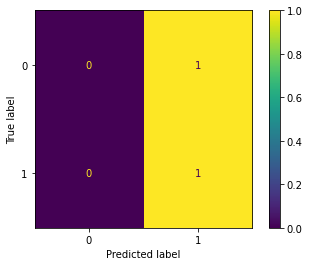

In [63]:
plot_confusion_matrix(final_svc_model,scaled_X_test,y_test,normalize = 'true')

In [64]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65       202

    accuracy                           0.48       202
   macro avg       0.50      0.24      0.32       202
weighted avg       1.00      0.48      0.65       202



## XGBoost

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb_model = XGBClassifier()

In [54]:
xgb_model.fit(scaled_X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [66]:
y_pred = xgb_model.predict(scaled_X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.4900990099009901

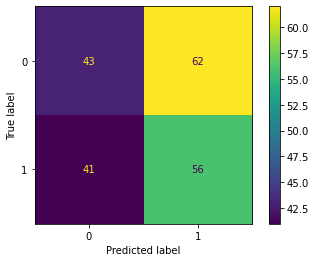

In [68]:
plot_confusion_matrix(xgb_model,scaled_X_test,y_test)

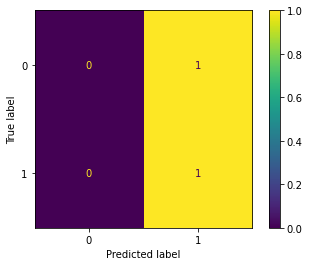

In [70]:
plot_confusion_matrix(final_svc_model,scaled_X_test,y_test,normalize = 'true')

In [72]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.41      0.51      0.46        84
           1       0.58      0.47      0.52       118

    accuracy                           0.49       202
   macro avg       0.49      0.49      0.49       202
weighted avg       0.51      0.49      0.49       202



## Checking roc_auc_curve

In [57]:
models = [log_model, final_svc_model,xgb_model]
 
for i in range(3):
    
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', roc_auc_score(y_train, models[i].predict_proba(scaled_X_train)[:,1]))
    print('Test Accuracy : ', roc_auc_score(y_test,models[i].predict_proba(scaled_X_test)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5396316708904363
Test Accuracy :  0.5186057928325969

SVC(C=0.01, probability=True) : 
Training Accuracy :  0.43572693944836755
Test Accuracy :  0.4897398134511537

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.9960971138941516
Test Accuracy :  0.494599901816

If we observe the above results, it seems that XGBClassifier is best model for predicting the stock price but this is only according to the training data but the test data says otherwise.Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case. 

So from the above results, it is evident that Logistic Regression is the best model for training the data for our task even tough it's accuracy, roc_auc_score is less but comapred to other models it performs great.

## Training the whole data on Logistic Regression

In [74]:
final_model = LogisticRegression()

In [75]:
final_model.fit(X,y)

LogisticRegression()

In [76]:
final_model.score(X,y)

0.5361744301288405

We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.

## Model Presistence

### Saving the model

In [79]:
import joblib

In [80]:
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [81]:
X.columns

Index(['open-close', 'low-high', 'is_quater_end'], dtype='object')

In [82]:
list(X.columns)

['open-close', 'low-high', 'is_quater_end']

In [83]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']

### Loading the model

In [84]:
col_names = joblib.load('column_names.pkl')

In [85]:
col_names

['open-close', 'low-high', 'is_quater_end']

In [86]:
loaded_model = joblib.load('final_model.pkl')

In [95]:
list(X.iloc[0])

[7.7400049999999965, -17.86999499999999, 0.0]

In [96]:
loaded_model.predict([list(X.iloc[0])])

array([1])

In [97]:
y.iloc[0]

1

In [103]:
list(X.iloc[1])

[-18.02000400000003, -21.700012000000015, 0.0]

In [104]:
loaded_model.predict([list(X.iloc[1])])

array([0])

In [105]:
y.iloc[1]

0

In [107]:
list(X.iloc[50])

[1.7799989999999752, -7.720000999999968, 0.0]

In [106]:
loaded_model.predict([list(X.iloc[50])])

array([1])

In [108]:
y.iloc[0]

1

In [ ]:
list(X_test.iloc[0])

In [112]:
loaded_model.predict([list(X_test.iloc[1])])

array([0])

In [116]:
y_test.iloc[1]

0

In [114]:
list(X_test.iloc[5])

[-4.290008999999998, -11.119995000000017, 1.0]

In [118]:
loaded_model.predict([list(X_test.iloc[5])])

array([1])

In [119]:
y_test.iloc[5]

1

So from the above results you can see that the model is performing well.

**THANK YOU**